In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/OSPTX.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
# Calculate return and lagged return
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Return,Lagged_Return
Date,,,,,,,
2006-10-10 16:00:00,11716.64,11757.75,11690.89,11755.15,180168080,0.549659,-0.503064
2006-10-11 16:00:00,11782.40,11784.43,11619.14,11619.14,250893136,-1.157025,0.549659
2006-10-12 16:00:00,11667.42,11719.09,11619.14,11719.09,194297872,0.860219,-1.157025
2006-10-13 16:00:00,11754.61,11908.57,11719.09,11908.57,223986016,1.616849,0.860219
2006-10-16 16:00:00,11947.41,12072.26,11908.57,12061.54,196978528,1.284537,1.616849


# Slice the data into Training and Testing data

In [4]:
# Slice train and test datasets


In [5]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):


In [6]:
# Display top rows for x_train


,Lagged_Return
Date,
2008-01-02 16:00:00,0.084796
2008-01-03 16:00:00,0.677363
2008-01-04 16:00:00,0.369361
2008-01-07 16:00:00,-1.428081
2008-01-08 16:00:00,-1.159118


In [7]:
# Display top rows for y_train


Date
2008-01-02 16:00:00    0.677363
2008-01-03 16:00:00    0.369361
2008-01-04 16:00:00   -1.428081
2008-01-07 16:00:00   -1.159118
2008-01-08 16:00:00   -0.566273
Name: Return, dtype: float64

# Fit the model to the Training Data

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [10]:
# And make a prediction of "y" values for just the test dataset


In [11]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:


In [12]:
# Display top 2 rows


,Return,Predicted Return
Date,,
2013-01-02 16:00:00,0.862506,-0.056772
2013-01-03 16:00:00,-0.560811,-0.051072


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1192a9e48>,
      dtype=object)

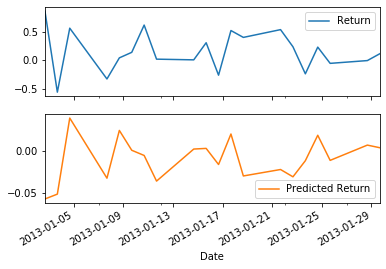

In [13]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar


# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)


# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):


Out-of-Sample Root Mean Squared Error (RMSE): 0.6234031165210682


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [15]:
# Construct a dataframe using just the "y" training data:


# Add a column of "in-sample" predictions to that DataFrame:  


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)



In-sample Root Mean Squared Error (RMSE): 1.5071845476051426
